**Import necessary libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**Load the dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/heart.csv')
print("🔹 Dataset Loaded Successfully!")
print(df.head())  # Display first few rows of data

🔹 Dataset Loaded Successfully!
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


**Check The Total Number Of Data Entries**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Splitting Features And Target Variables**

In [ ]:
# Splitting features and target variable
X = df.drop(columns=['HeartDisease'])  # Independent variables
y = df['HeartDisease']  # Target variable
print("\n✅ Features & Target Separated!")
print("Feature Columns:", X.columns.tolist())
print("Target Distribution:\n", y.value_counts())


✅ Features & Target Separated!
Feature Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
Target Distribution:
 HeartDisease
1    508
0    410
Name: count, dtype: int64


**Identifying Categorical Column**

In [ ]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("\n📌 Categorical Columns Identified:", categorical_cols)


📌 Categorical Columns Identified: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


**Handling Categorical Data Properly And Convert Into Numeric Format**
One-Hot Encoding is applied to categorical columns (object dtype).

Now, all categorical features are properly converted into numerical format before training

In [ ]:
# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
# Convert boolean columns to integers (0/1)
X = X.astype(int)
print("\n🎨 One-Hot Encoding Applied!")
print(X.head())


🎨 One-Hot Encoding Applied!
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
0   40        140          289          0    172        0      1   
1   49        160          180          0    156        1      0   
2   37        130          283          0     98        0      1   
3   48        138          214          0    108        1      0   
4   54        150          195          0    122        0      1   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  \
0                  1                  0                 0                  1   
1                  0                  1                 0                  1   
2                  1                  0                 0                  0   
3                  0                  0                 0                  1   
4                  0                  1                 0                  1   

   RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  ST_Slope_Up  
0              0

**Split Data Into Training and Testing**

In [ ]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n📊 Data Split into Training and Testing Sets!")
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


📊 Data Split into Training and Testing Sets!
Training Data Shape: (734, 15)
Testing Data Shape: (184, 15)


***Feature Scaling at the Right Stage ***StandardScaler is applied after splitting the dataset into X_train and X_test.

This ensures that test data is scaled using the same transformation as training data.

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("\n⚖️ Feature Scaling Applied!")


⚖️ Feature Scaling Applied!


**Build The ANN Model**

In [ ]:
# Build ANN model
classifier = Sequential()
print("\n🛠️ Building ANN Model...")


🛠️ Building ANN Model...


In [ ]:
# Adding the input layer and first hidden layer
classifier.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))
print("✅ Input Layer & First Hidden Layer Added!")

✅ Input Layer & First Hidden Layer Added!


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Adding second hidden layer
classifier.add(Dense(units=8, activation='relu'))
print("✅ Second Hidden Layer Added!")

✅ Second Hidden Layer Added!


In [ ]:
# Adding output layer (binary classification → sigmoid activation)
classifier.add(Dense(units=1, activation='sigmoid'))
print("✅ Output Layer Added!")

✅ Output Layer Added!


**Compile The ANN Model**

In [ ]:
# Compile the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("\n🚀 Model Compiled Successfully!")


🚀 Model Compiled Successfully!


**Train The Model Using Epoch After That Visualize Acuuracy And Loss**

In [ ]:
# Train the model and store the training history
print("\n📝 Training Model...")
history = classifier.fit(X_train, y_train, batch_size=10, epochs=100, verbose=1, validation_data=(X_test, y_test))
print("\n✅ Model Training Completed!")


📝 Training Model...
Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4459 - loss: 0.7673 - val_accuracy: 0.6739 - val_loss: 0.6427
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7556 - loss: 0.5787 - val_accuracy: 0.7772 - val_loss: 0.5307
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8262 - loss: 0.4458 - val_accuracy: 0.8043 - val_loss: 0.4516
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8562 - loss: 0.3805 - val_accuracy: 0.8424 - val_loss: 0.4048
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8831 - loss: 0.3430 - val_accuracy: 0.8424 - val_loss: 0.3842
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8669 - loss: 0.3263 - val_accuracy: 0.8533 - val_loss: 0.3676
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8711 - loss: 0.3187 - val_accuracy: 0.8641 - val_loss: 0.3594
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8469 - loss: 0.3303 - va

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


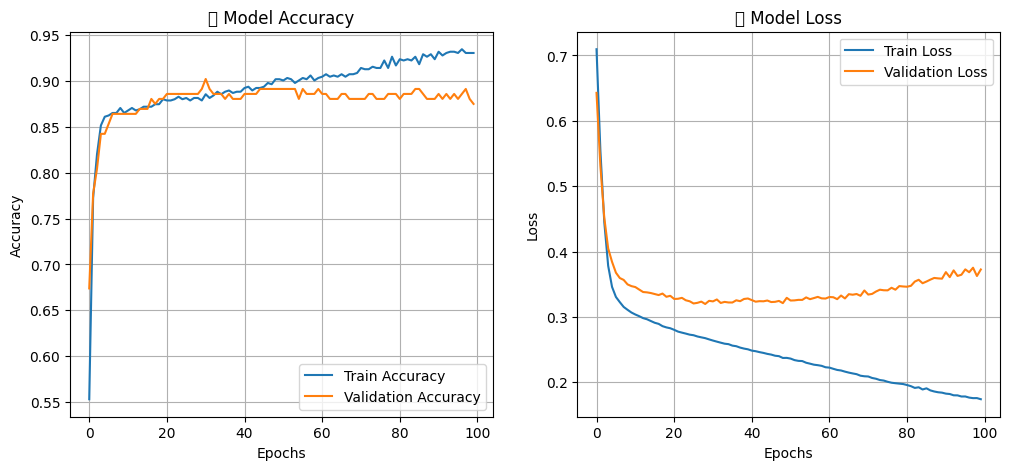


📊 Training Progress Visualized!


In [ ]:
# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('📈 Model Accuracy')
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('📉 Model Loss')
plt.legend()
plt.grid()

plt.show()
print("\n📊 Training Progress Visualized!")


**Predict Test Set Results**

In [ ]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary values
print("\n🔍 Predictions Generated!")
print("First 10 Predictions:", y_pred[:10].flatten())

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

🔍 Predictions Generated!
First 10 Predictions: [0 1 1 1 0 1 1 0 1 1]


**Model Evalution**

In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print("\n📑 Classification Report:\n", report)


📑 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n🎯 Model Accuracy:", round(accuracy * 100, 2), "%")


🎯 Model Accuracy: 87.5 %


In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:\n", conf_matrix)


📊 Confusion Matrix:
 [[67 10]
 [13 94]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


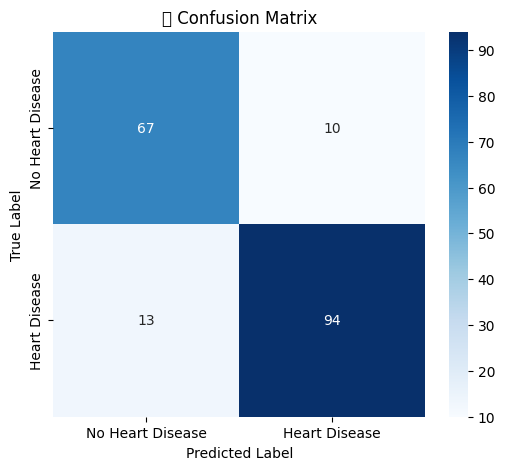


✅ Confusion Matrix Visualized!


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])

# Labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('📌 Confusion Matrix')
plt.show()
print("\n✅ Confusion Matrix Visualized!")